<h2>Big Data Project SuperMarket Sales</h2>

<ol>
  <li>Muhammad Sheroz 9852</li>
  <li>Kehkashan Akram 9825</li>
  <li>Hassan Noor Soomro 9827</li>
</ol>  

In [132]:
from pyspark.sql import SparkSession

In [133]:
spark = SparkSession.builder.appName("ml-project").getOrCreate()

In [134]:
df = spark.read.csv("./Data/supermarket_sales_Sheet1.csv",inferSchema=True, header = True)

In [135]:
df.printSchema()

root
 |-- InvoiceID: string (nullable = true)
 |-- Branch: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Customer type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Productline: string (nullable = true)
 |-- Unitprice: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Tax 5%: double (nullable = true)
 |-- Total: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Payment: string (nullable = true)
 |-- cogs: double (nullable = true)
 |-- grossmarginpercentage: double (nullable = true)
 |-- grossincome: double (nullable = true)
 |-- Rating: double (nullable = true)



In [136]:
print((df.count(), len(df.columns)))

(1000, 17)


In [137]:
df.filter(df.Quantity==0).count()

0

In [138]:
from pyspark.sql.functions import isnull, when, count, col
df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+---------+------+----+-------------+------+-----------+---------+--------+------+-----+----+----+-------+----+---------------------+-----------+------+
|InvoiceID|Branch|City|Customer type|Gender|Productline|Unitprice|Quantity|Tax 5%|Total|Date|Time|Payment|cogs|grossmarginpercentage|grossincome|Rating|
+---------+------+----+-------------+------+-----------+---------+--------+------+-----+----+----+-------+----+---------------------+-----------+------+
|        0|     0|   0|            0|     0|          0|        0|       0|     0|    0|   0|   0|      0|   0|                    0|          0|     0|
+---------+------+----+-------------+------+-----------+---------+--------+------+-----+----+----+-------+----+---------------------+-----------+------+



In [139]:
from pyspark.sql.types import *

In [140]:
df = df.withColumn("Rating",df.Rating.cast("integer"))
df = df.withColumn("grossincome",df.Rating.cast("integer"))

In [141]:
import seaborn as sns

<AxesSubplot:>

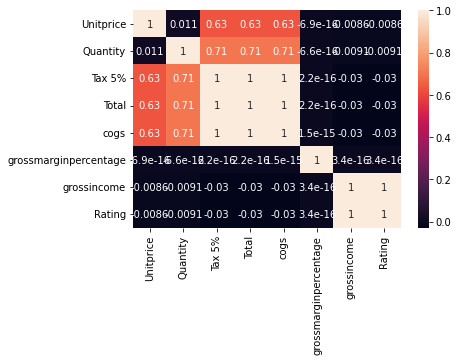

In [142]:
sns.heatmap(df.toPandas().corr(), annot = True)

In [143]:
y = df.drop('InvoiceID','Gender','Product','Date','Time','Payment','Branch','City','Customer type','Productline','gross income')
y.show()


+---------+--------+-------+--------+------+---------------------+-----------+------+
|Unitprice|Quantity| Tax 5%|   Total|  cogs|grossmarginpercentage|grossincome|Rating|
+---------+--------+-------+--------+------+---------------------+-----------+------+
|    74.69|       7|26.1415|548.9715|522.83|          4.761904762|          9|     9|
|    15.28|       5|   3.82|   80.22|  76.4|          4.761904762|          9|     9|
|    46.33|       7|16.2155|340.5255|324.31|          4.761904762|          7|     7|
|    58.22|       8| 23.288| 489.048|465.76|          4.761904762|          8|     8|
|    86.31|       7|30.2085|634.3785|604.17|          4.761904762|          5|     5|
|    85.39|       7|29.8865|627.6165|597.73|          4.761904762|          4|     4|
|    68.84|       6| 20.652| 433.692|413.04|          4.761904762|          5|     5|
|    73.56|      10|  36.78|  772.38| 735.6|          4.761904762|          8|     8|
|    36.26|       2|  3.626|  76.146| 72.52|          

In [144]:
x = y.drop('Rating')
x.show()


+---------+--------+-------+--------+------+---------------------+-----------+
|Unitprice|Quantity| Tax 5%|   Total|  cogs|grossmarginpercentage|grossincome|
+---------+--------+-------+--------+------+---------------------+-----------+
|    74.69|       7|26.1415|548.9715|522.83|          4.761904762|          9|
|    15.28|       5|   3.82|   80.22|  76.4|          4.761904762|          9|
|    46.33|       7|16.2155|340.5255|324.31|          4.761904762|          7|
|    58.22|       8| 23.288| 489.048|465.76|          4.761904762|          8|
|    86.31|       7|30.2085|634.3785|604.17|          4.761904762|          5|
|    85.39|       7|29.8865|627.6165|597.73|          4.761904762|          4|
|    68.84|       6| 20.652| 433.692|413.04|          4.761904762|          5|
|    73.56|      10|  36.78|  772.38| 735.6|          4.761904762|          8|
|    36.26|       2|  3.626|  76.146| 72.52|          4.761904762|          7|
|    54.84|       3|  8.226| 172.746|164.52|        

In [145]:
from pyspark.ml.feature import VectorAssembler

In [146]:
assembler = VectorAssembler(inputCols=x.columns, outputCol='features')
transformed_data = assembler.transform(df)
transformed_data.show(truncate=False)


+-----------+------+---------+-------------+------+----------------------+---------+--------+-------+--------+---------+-----+-----------+------+---------------------+-----------+------+---------------------------------------------------+
|InvoiceID  |Branch|City     |Customer type|Gender|Productline           |Unitprice|Quantity|Tax 5% |Total   |Date     |Time |Payment    |cogs  |grossmarginpercentage|grossincome|Rating|features                                           |
+-----------+------+---------+-------------+------+----------------------+---------+--------+-------+--------+---------+-----+-----------+------+---------------------+-----------+------+---------------------------------------------------+
|750-67-8428|A     |Yangon   |Member       |Female|Health and beauty     |74.69    |7       |26.1415|548.9715|1/5/2019 |13:08|Ewallet    |522.83|4.761904762          |9          |9     |[74.69,7.0,26.1415,548.9715,522.83,4.761904762,9.0]|
|226-31-3081|C     |Naypyitaw|Normal       |

In [147]:
#split the data
(x_train,x_test) = transformed_data.randomSplit([0.8,0.2])

In [148]:
from pyspark.ml.classification import DecisionTreeClassifier
clf = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Rating', maxDepth = 3 )

In [149]:
type(x_train)

pyspark.sql.dataframe.DataFrame

In [150]:
model = clf.fit(x_train)

In [152]:
predictions = model.transform(x_test)
predictions.select('InvoiceID', 'Branch', 'Customer type','Gender','Productline','Unitprice', 'Quantity','Tax 5%','Total','Date','Time','Payment','cogs','grossmarginpercentage','grossincome','Rating','prediction').show()

+-----------+------+-------------+------+--------------------+---------+--------+-------+--------+---------+-----+-----------+------+---------------------+-----------+------+----------+
|  InvoiceID|Branch|Customer type|Gender|         Productline|Unitprice|Quantity| Tax 5%|   Total|     Date| Time|    Payment|  cogs|grossmarginpercentage|grossincome|Rating|prediction|
+-----------+------+-------------+------+--------------------+---------+--------+-------+--------+---------+-----+-----------+------+---------------------+-----------+------+----------+
|101-17-6199|     A|       Normal|  Male|  Food and beverages|    45.79|       7|16.0265|336.5565|3/13/2019|19:44|Credit card|320.53|          4.761904762|          7|     7|       7.0|
|105-31-1824|     A|       Member|  Male|   Sports and travel|    69.52|       7| 24.332| 510.972| 2/1/2019|15:10|Credit card|486.64|          4.761904762|          8|     8|       8.0|
|106-35-6779|     A|       Member|  Male|  Home and lifestyle|    44.3

In [153]:
predictions.groupBy('Rating', 'prediction').count().show()


+------+----------+-----+
|Rating|prediction|count|
+------+----------+-----+
|     4|       4.0|   31|
|     5|       5.0|   36|
|     6|       6.0|   36|
|     7|       7.0|   31|
|     9|       9.0|   26|
|     8|       8.0|   27|
+------+----------+-----+



In [161]:
# calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 6 AND Rating = prediction').count()
TP = predictions.filter('prediction = 4 AND Rating = prediction').count()
FN = predictions.filter('prediction = 9 AND Rating <> prediction').count()
FP = predictions.filter('prediction = 7 AND Rating <> prediction').count()

In [162]:
accuracy_DecisionTree = (TN + TP) / (TN + TP + FN +FP)
precision_DecisionTree = TP / (TP + FP)
recall_DecisionTree = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_DecisionTree)
print('n precision: %0.3f' % precision_DecisionTree)
print('n recall: %0.3f' % recall_DecisionTree)
print(TN , TP , FN , FP)

n accuracy: 1.000
n precision: 1.000
n recall: 1.000
36 31 0 0


In [163]:
y_true = predictions.select('Rating').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

In [164]:
len(y_pred)

187

In [165]:
from sklearn import metrics

In [166]:
cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0 36  0  0  0  0]
 [ 0  0 36  0  0  0]
 [ 0  0  0 31  0  0]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  0 26]]


In [167]:
import matplotlib.pyplot as plt

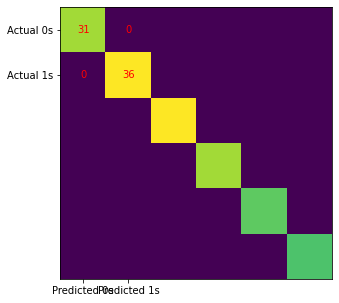

In [168]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red')
plt.show()